<center>
    <h3>University of Toronto</h3>
    <h3>Department of Mechanical and Industrial Engineering</h3>
    <h3>MIE368 Analytics in Action </h3>
    <h3>(Fall 2022)</h3>
    <hr>
    <h1>Lab 3`: Classification and Regression Trees (CART) and Random Forest</h1>
    <h3>September 28, 2022</h3>
</center>


# Introduction
In this lab we investigate the use of classification and regression trees (CART) and random forests. Unlike linear and logistic regression, these methods do not make any assumptions about the target variable being linearly dependent on the independent feature variables. Instead, they are data-driven and use a number of logical rules to classify observations and make associated predictions. CART and random forests can be used to predict both continuous and discrete (categorical) targets.





## Background and Methods
In this section we provide a high-level description of the methods studied within this lab, namely CART and random forests. These methods are forms of decision tree learning where sample observation characteristics are mapped to conclusions about the sample observation’s target value (i.e., the prediction). The main difference between the two methods is that CART uses a single decision tree while random forests use multiple trees, as discussed in subsequent sections.

## Classification and Regression Trees (CART) Information
These models consist of a single decision tree that looks to capture non-linearities between the input features and the output target. A major advantage that CART models have over other classification models such as logistic regression, is their interpretability. While logistic regression is useful in describing the likelihood of an event to be predicted, a CART model can procedurally show exactly what each feature needs to be in order to yield a given event.

If we recall from lecture, CART was presented in the context of the American Supreme Court, where we looked to predict whether the Supreme Court judges (Justices) would affirm (uphold) or reverse (overturn) lower court decisions. Model predictions were made based on six feature variables with associated binary (yes/no) responses. These variables include responses to questions such as: i) Is the lower court decision liberal? ii) Is the case from District _A_?. In this particular application, the interpretability of a specific prediction is highly valued.

Figure 1 illustrates a CART for a colour prediction problem with two feature variables and two output classes (i.e., red or gray). To build a CART model we _split_ on the selected feature variables (in some particular order), producing child nodes from each parent node. Each split is based on a single independent feature variable. For the model illustrated in Figure 1, our first split uses the question "is $X < 60$?", which produces a binary yes/no response. If the response is _yes_ then we classify the observation as red immediately, however, if the response is _no_, deeper nodes within the tree must be explored. 

<img src="https://docs.google.com/uc?export=view&id=1uWGSkB2AlAx0DcyS_9DgO-YJeQNsPZKu" 
alt=""/>

Figure 1: Classification and regression tree (CART) with two feature variables.

A prediction (classification) of the observation is made whenever a leaf node (i.e., a node with no children) is reached within the decision tree. At such leaves the percentage of observations in a given group (e.g., red or gray) is calculated and a threshold is applied to make a prediction. The splits within a CART are selected to produce the most _pure_ children (i.e., the cleanest separation of the classes). In this example there are only two classes, however, CART can be used for multi-class problems as well as continuous problems.

There are a number of choices to make when designing and training a specific CART model, including:

- Which feature variable should we split on? When? Some relevant metrics for answering these questions are Gini and Entropy measures.
- How many splits are generated within our CART? For example, you could try constraining the number of splits generated using lower/upper bounds.

Such parameter selection for the design of CART models is crucial to the performance of the model. In general, we try to select parameter values that produce good results. Though it may be tempting, choosing the parameters that yield the highest prediction accuracy is not necessarily the way to go due to overfitting. As discussed in previous labs, techniques such as m-Fold Cross Validation can ensure our parameters will perform best on various input observation sets, thus avoiding this issue.


### Exercise

Answer the following review questions related to CART:
1. Would a statistically insignificant variable be useful to split on in a CART model?

  ___
 __Question 1 Answer__:

___

2. Should we always select the CART design parameters that maximize accuracy on the test set?

___
__Question 2 Answer__:

___

3. True/False: CART models can only be used for problems with two prediction classes

___
__Question 3 Answer__:

___

## Random Forests Information

This approach was designed primarily as a way to boost the performance of CART. Random forests are a form of ensemble method that combines predictions from multiple models to attain a better overall performance than each of the individual underlying models. Specifically, random forests combine a large number of CART trees, each of which ‘vote’ on the outcome, to deduce a final prediction. Although there are a large number of voting rules that could be used, a simple and common one for classification is a _majority rule_, which states that if most of the trees in a forest give a certain prediction, then the forest gives that same prediction. A similarly simple rule for regression ensembles is an average rule.

Random forests are formed by running CART on a subset of the observations (from the total training set) and a subset of feature variables (from the total feature variable set). Note, it is common practice to use a subset of observations, but it is not strictly required. The process of creating a subset of observations used in random forest (and other ensemble methods) is termed *bootstrap aggregating*, or *bagging*, (the term bagging is derived as a short form of **b**ootstrap **agg**regat**ing**). 

Within the bootstrap aggregating (bagging) approach, we create multiple *bootstrapped* samples of the dataset. Each bootstrapped sample has size $m$ and does not have to be the same size of the full dataset, $n$. When creating each bootstrapped sample, we sample with replacement from the full dataset, meaning we could have duplicate rows from the original dataset in our bootstrapped sample. For example, two valid bootstrapped samples of the dataset {$1,2,3,4,5$} could be {$1,3,4$} and {$2,5,2$}, as they contain only elements from the original data set, and both samples are the same size ($m=3$).

To summarize, *Bootstrapping* is a sampling technique and *Bagging* is a machine learning ensemble model that is built using bootstrapped samples.

As covered in CART, there are a number of parameter design decisions to make for a specific random forest model (independent of the underlying CART design):

 - The number of CART trees to build (typically set to the order of $10^2$)
 - More trees can result in longer computation times, but typically stronger performance (i.e., tradeoff in construction time and prediction performance)
 
These parameter choices are in addition to those selected for CART design (e.g., size of each individual trees). Due to their ensemble nature, random forests are less sensitive to model parameters, however, how they arrive at their predictions is effectively impossible to inteprete (making it a _black box_). As a black box, a random forest is likely not suitable for the Supreme Court example covered in lecture. 



### Exercise

Answer the following questions related to random forest:
1. Could you combine a CART tree and a logistic regression as an ensemble method? Why/why not?

___
__Question 1 Answer__:

___

2. What would a potential bootstrapped sample of the dataset {1,2,3,4,5,6} be?

___
__Question 2 Answer__:

___

3. True/False: The predictions of a random forest are more easily interpreted than those of a single CART tree.

___
__Question 3 Answer__:

___


# Application
In this lab, we investigate vandalism in Wikipedia (en.wikipedia.org). Wikipedia is the world’s largest free online encyclopedia, containing in the neighbourhood of 5.8 million articles with roughly 156,000 edits per day. Wikipedia allows anyone to contribute/edit entries, which promotes rapid content creation and community-based error checking. An unfortunate side effect of this approach is the presence of vandalism. Specifically, we refer to pages that have had information removed, incorrect information added, or the presence of inappropriate content. Due to the volume of entries being changed on a daily basis, it is incredibly difficult to manually (i.e., human checking) ensure the accuracy of pages and remove any instances of vandalism.

In this lab, we will look at a dataset that summarizes the revision history for the [“Language” entry on Wikipedia](https://en.wikipedia.org/wiki/Language). We will conduct some exploratory data analysis (EDA) and look into predicting whether a particular revision was an instance of vandalism or not. For this application, an accurately performing model can be very useful - the free and accurate flow of world information depends on it! Please answer the questions wherever a blank is provided, and discuss answers with your peers.

The following sections detail the main steps associated with this lab. First, we will start by understanding decision trees (CART) a little better through the use of a written example. Next, we use `sklearn` to explore the data and build CART trees and random forests for the full Wikipedia dataset. Let’s get started! As usual we will load the necessary packages and load the dataset.

In [ ]:
# Import packagesimport matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegressionCV


# Load dataset
df = pd.read_csv('https://docs.google.com/uc?export=download&id=1zIXF6ReaoqdglnMsQf5u6zQdfEvu8paT') 
df.head() # prints the first 5 rows of the dataframe 

,Vandal,Minor,LoggedIn,HTTP,NumWordsAdded,NumWordsRemoved
0,0,1,1,1,96,0
1,0,1,1,0,3,1
2,0,0,1,0,0,4
3,0,1,0,0,10,92
4,0,1,1,1,94,10


The table below contains the data dictionary.

|Feature          |Definition                                             |
|:---------------:|:------------------------------------------------------|
|Vandal           |1 if the edit was vandalism, 0 if not                  |
|Minor            |1 if the edit was marked as a minor edit, 0 if not     |    
|LoggedIn         |1 if the user made edit from Wiki account, 0 if not    |
|HTTP             |1 if edit contained web address, 0 if not              | 
|NumWordsAdded    |Number of unique words added                           |
|NumWordsRemoved  |Number of unique words removed                         |



## Decision Trees by Hand (Pencil and Paper / Textual if-then Visual)

You are given a small sample of the total Wikipedia vandalism data as illustrated
below. The first two rows in the sample data contains two entry edits that were not vandalism, and last two edits  were. Given this data, design and illustrate two different binary decision trees (CART trees) that meet the following criteria:

1. First CART tree: Classifies all data points with 100% accuracy.
2. Second CART tree: Uses a maximum of two splits, and classifies the data with $\ge$ 75% accuracy.

In [ ]:
print(df.loc[list([0,1,2843,2844])])

# Write your comment here.

# -------------------






# -------------------

     Vandal Minor LoggedIn HTTP NumWordsAdded NumWordsRemoved
0         0     1        1    1            96               0
1         0     1        1    0             3               1
2843      1     1        1    0             1              12
2844      1     0        1    0            13               0


## Exploratory data analysis


### Exercise 

Prior to using CART and random forests to make predictions, we start with EDA to get a better feel for the Wikipedia dataset we are using.
1. Are there any non-numerical data values?

In [ ]:
# df_digit_indicator is calculated below to get you started. 
df_digit_indicator = df.applymap(lambda x: x.isdigit())  

# Write your code here.  

# -------------------


(df_digit_indicator==False).sum()


# -------------------

Vandal             2
Minor              1
LoggedIn           2
HTTP               1
NumWordsAdded      2
NumWordsRemoved    1
dtype: int64

2. Are they properly stored as `NaN`, and if not, what are they stored as?

In [ ]:
# Write your code here.  

# -------------------

for col in df.columns:
  print(df[col][df_digit_indicator[col] == False].value_counts())

# -------------------

ERROR    2
Name: Vandal, dtype: int64
ERROR    1
Name: Minor, dtype: int64
ERROR    2
Name: LoggedIn, dtype: int64
ERROR    1
Name: HTTP, dtype: int64
ERROR    2
Name: NumWordsAdded, dtype: int64
ERROR    1
Name: NumWordsRemoved, dtype: int64


Now that we have identified some issues with the data, we should clean it and ensure all the entries are integer.

3. Remove any invalid data points from `df`. Use this new `df` for the remainder of this lab.

In [ ]:
# Write your code here.  

# -------------------


df = df.replace('ERROR', np.nan)
df = df.dropna()

# -------------------

# Once the rows are deleted (or even before) it's important to ensure
# that all elements in this df are numeric. The code below will change
# strings to numeric values. 

df = df.apply(pd.to_numeric, errors='coerce')

It will be easier to continue the EDA now that we have clean data in `df`.

4. How many edits are considered? 

In [ ]:
# Write your code here.  

# -------------------


len(df)

# -------------------

3867

5. What percentage of the edits were deemed to be vandalism?

In [ ]:
# Write your code here.  

# -------------------

df.Vandal.sum()/len(df)


# -------------------

0.46754590121541245

6. Of all the vandal edits, which one added the most words, and how many words were added?

In [ ]:
# Write your code here.  

# -------------------


df.loc[df.NumWordsAdded.idxmax()]

# -------------------

Vandal               0
Minor                0
LoggedIn             1
HTTP                 0
NumWordsAdded      259
NumWordsRemoved      1
Name: 357, dtype: int64

7. Based on a cursory review of the dataset and domain intuition, which two feature variables (e.g., Minor, LoggedIn, HTTP, NumWordsAdded, and NumWordsRemoved) do you believe to be the most significant in predicting vandalism? Why? (No objective correct answer).

___
__Question 7 Answer__:


___

## Splitting the Data
Randomly split data clean into a training set and test set, named data train and data test, respectively. We will place 70% of the data into the training set and the remainder in the test set. We will do this using the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from `sklearn.model_selection`

In [ ]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Vandal', axis=1), df['Vandal'], test_size=0.30, random_state=5)


### Exercise

Answer the following questions:

1. How many points are in the training set?

In [ ]:
# Write your code here.  

# -------------------

len(X_train)

# -------------------

2706

2. How many confirmed vandalisms are in y_train?

In [ ]:
# Write your code here.  

# -------------------

y_train.sum()

# -------------------

1257

# Using CART and RF with sklearn

In the next section we will go over how the use the CART and RF classifiers in `sklearn`. The purpose of both of these methods is to classify target variables (e.g., Wikipedia edit is or is not vandalized), hence, these methods are more similar to logistic regression than they are to linear regression. Note, that random forest regression is also available in `sklearn`, which should be used instead of the classifiers if you're looking for a model to predict continuous values between positive and negative infinity (e.g., number of edits).



## CART Model

Use the [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) function within `sklearn.tree`  to fit a CART model to the training set. There are several parameters that you can tune to prevent over fitting and to get better model accuracy. Recall that cross validation should be used to pick the best parameters for the model, but for simplicity we will neglect that step in this lab. One parameter you can set is `max_depth`, which controls the maximum number of levels in your trained model. In the example below we set the `max_depth` to three and visualize the resulting tree.  Figure 2 illustrates what a possible CART tree could look like for this application. Based on your produced tree, answer the following questions:

The score of this model over training data is 0.730 and 0.717 over the testing data


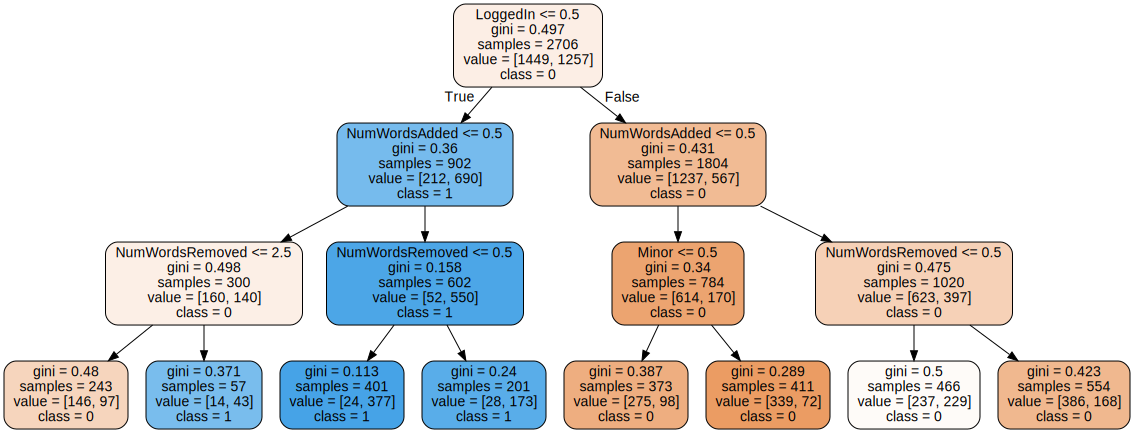

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import export_graphviz
# from IPython.display import SVG
# from graphviz import Source

# Train the CART model
cart_model = DecisionTreeClassifier(random_state=3,max_depth=3)
cart_model.fit(X_train, y_train)
train_score = cart_model.score(X_train, y_train)
test_score = cart_model.score(X_test, y_test)

# Print out summary of model performance 
print('The score of this model over training data is {:.3f} and {:.3f} over the testing data'.format(train_score, test_score))

# Visualize the decision tree
cart_graph = Source(export_graphviz(cart_model,
                   feature_names = df.columns[1:],
                   rounded = True, proportion = False, 
                   filled = True,
                   class_names=['0','1']))
SVG(cart_graph.pipe(format='svg'))

### Exercise 

Based on the tree, answer the following questions:
1. How many nodes are in the tree? You can count on the image, or use the method `tree_.node_count` on your model.

In [ ]:
# Write your code here.  

# -------------------

cart_model.tree_.node_count

# -------------------

15

___
__Question 1 Answer__:


___

2. Which feature variable is split at the root node?

___
__Question 2 Answer__:


___

3. Apply the `feature_importances` method on your model, which of the feature variables are important? Note, these values returned by `feature_importances` are also known as the Gini measure of the variable. The variables with the larger importance or Gini measures are the ones that we split on at the top of the tree and are considered more important. 

In [ ]:
# Write your code here.

# -------------------

pd.DataFrame(cart_model.feature_importances_, index=X_train.columns).T

# -------------------

,Minor,LoggedIn,HTTP,NumWordsAdded,NumWordsRemoved
0,0.007789,0.63467,0.0,0.276306,0.081235


4. Assess the accuracy of your model on the testing set. What % of predictions are correct?

In [ ]:
# Write your code here.  

# -------------------

np.mean(cart_model.predict(X_test) == y_test)


# -------------------

0.7166236003445305

In [ ]:
cart_model.score(X_test, y_test)

0.7166236003445305

5. Constrain the `max_depth` to 10. What is the new accuracy of the model on the training and testing set? Do you think this model has overfit the data?

In [ ]:
# Write your code here.

# -------------------

cart_model = DecisionTreeClassifier(random_state=0,max_depth=10)
cart_model.fit(X_train, y_train)
mdlAccTrain = np.mean((cart_model.predict(X_train) == y_train))
mdlAccTest = np.mean((cart_model.predict(X_test) == y_test))

print('The accuracy on the: \n\t training data is {}'.format(round(mdlAccTrain,3)))
print('\t testing data is {}'.format(round(mdlAccTest,3)))

# -------------------

The accuracy on the: 
	 training data is 0.773
	 testing data is 0.721


___
__Question 5 Answer__:


___

Throughout this lab we will fit and "score" models several time, so to be efficient (and to follow good coding practice!) we should make a function that fits and scores a model. For future labs and projects you should try to introduce functions where possible. 

In [ ]:
def fit_and_score_model(mdl, X_train, X_test, y_train, y_test, random_state=0):
    """
    This function will fit and score the input mdl to the X_train and y_train 
    data, and score the mdl on y_train and y_test. To ensure results are 
    reproducible we can also set a random state.
    """
  
    # Fit an arbitrary model
    mdl.fit(X_train, y_train)
    
    # Calculate the score of the model on training and testing data
    train_score = mdl.score(X_train, y_train)
    test_score = mdl.score(X_test, y_test)
  
    # Print scores to terminal
    print('the accuracy on the: \n\t training data is {}'.format(round(train_score,3)))
    print('\t testing data is {}'.format(round(test_score, 3)))
    
    return train_score, test_score
  
# As an example, you can now call the function fit_and_score_model
cart_model = DecisionTreeClassifier(random_state=0,max_depth=10)
train_score, test_score = fit_and_score_model(cart_model, X_train, X_test, y_train, y_test)

the accuracy on the: 
	 training data is 0.773
	 testing data is 0.721


## Random Forest Model

As was dicussed in the background section, individual CART trees can tend to overfit the data. To reduce this effect, and improve subsequent model performance, we can combine the results of many decision trees in a random forest.

Use the [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) function from `sklearn.ensemble` to create a random forest model. This function combines classification trees by default (as required) and creates a bootstrapped sample of the full dataset.

Set the size of each bootstrapped sample to *0.2*, which corresponds to one fifth the size of the training data by using the `max_samples` parameter. We also set the `bootstrap` parameter to *True*. Note: We didn't have to make the bootstrapped sample size equal to one fifth of the training dataset. This is a parameter that can be tuned, but we will not focus on that for this lab. (It is possible to have the bootstrapped size = full training data set size as well, since our sampling with replacement will still create different datasets used to create each tree).

Include 50 individual CART trees in your random forest model using the `n_estimators` parameter. Set the `random_state` attribute to 0 which will allow us to all produce the same results.

Experiment with `max_depth` parameter of `RandomForestClassifier` $\in$ {2, 3, 4, 5, 6, 7} and measure the accuracy on the testing set. 

Note, we do not need to explicitly specify the proportion of the features we will use for each CART tree in the random forest, because the default setting for `RandomForestClassifier` is $\sqrt{n\_features}$

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

depths = [2, 3, 4, 5, 6, 7]
accuracy = pd.Series(index=depths, dtype=float)

# Write your code here. 

# -------------------

for max_depth in depths:

    model = RandomForestClassifier(
        random_state = 0, 
        max_depth = max_depth,
        n_estimators = 50,
        max_samples = 0.2
    )
    
    print('For {} max_depth '.format(max_depth), end='')
    train_score, test_score = fit_and_score_model(model, X_train, X_test, y_train, y_test)
    
    # Save model performance to dataframe
    accuracy.loc[max_depth] = test_score

# -------------------

For 2 max_depth the accuracy on the: 
	 training data is 0.712
	 testing data is 0.716
For 3 max_depth the accuracy on the: 
	 training data is 0.738
	 testing data is 0.724
For 4 max_depth the accuracy on the: 
	 training data is 0.74
	 testing data is 0.724
For 5 max_depth the accuracy on the: 
	 training data is 0.752
	 testing data is 0.731
For 6 max_depth the accuracy on the: 
	 training data is 0.753
	 testing data is 0.73
For 7 max_depth the accuracy on the: 
	 training data is 0.755
	 testing data is 0.73


### Exercise

Based on your random forest model, answer the following questions:
1. What was the `max_depth` in your best performing random forest?

In [ ]:
# Write your code here.
# -------------------


accuracy.idxmax()

# -------------------

5

2. What is the accuracy/score of your best performing random forest?

In [ ]:
# Write your code here.
# -------------------


accuracy.max()

# -------------------

0.7312661498708011

3. Is this a fair way to choose model parameters? Why or why not?

___
__Question 3 Answer__:


___



4. Does increasing the `max_depth` increase or decrease overfitting?

___
__Question 4 Answer__:




___

5. Does your best random forest model out perform your CART model?

___
__Question 5 Answer__:



___

# Cross-validation

Now that we can code the CART (`DecisionTreeClassifier`) and random forests (`RandomForestClassifier`) it's time to learn about how to adjust parameters to improve model performance. In this section, we'll focus exclusively on the RF, but the methods generalize to other models (e.g., linear regression, CART, deep learning). In the Random Forest section, we chose an appropriate value for the `max_depth` parameter by evaluating the model on the test data (i.e., `X_test` and `y_test`). However, this is cheating because we are using the test set to make modeling decisions. In the real world, we should deploy a model that generalizes well to unseen data. If we use the test set to help tune our model, then the model has "seen" the test data so we can no longer offer guarantees about how well it will generalize to unseen data.

To address the issue, we will apply a procedure called cross-validation to select model parameters using only the training set. There are various ways to perform cross-validation. We will focus on a popular method called *m*-fold cross-validation where *m* is a parameter representing the number of groups that the training set is split into. Specifically, given a model, the general procedure is summarized below.

1.   Randomly shuffle the training set.
2.   Partition the training set into *m* groups of equal size.
3.   For each group:
    
>a. Take the group as a hold-out subset for model evaluation.

>b. Take the remaining groups as the training data.

>c. Fit the model on the training data.
    
>d. Evaluate the model on the hold-out set using the selected performance measure.

4. Summarize the measure of performance across the *m* (e.g. average the *m* validation results).

In this procedure, each data point in the training set is in the hold-out set exactly once and is used to train the model *m-1* times. The aggregated performance measure calculated in step 4 provides a less biased estimate of the model performance on unseen data, compared to a single train-test split, because it considers the variability across different splits. We thus use this aggregated measure to select model parameters. Once the "best" parameters are selected, we can re-train the model using the entire training set and the selected parameter, and then evaluate the final model using the test set. Important note that the purpose of this evaluation is to provide a more accurate estimate of model performance on unseen data. We can not go back to change the selected model parameters.

As you may notice, *m* is another parameter that we have to choose. For simplicity, we set *m = 5* in this lab. But any value of *m* can be selected in practice.

Now, let's use cross-validation to choose the `max_depth` parameter in our RF model. We will use `cross_validate` from `sklearn` to make the appropriate data splits, and we'll take the model with the highest average score.

In [ ]:
# from sklearn.model_selection import cross_validate

# Initialize cross validation score DataFrame
depth_lb = 1
depth_ub = 21
cv_scores = pd.Series(index=np.arange(depth_lb, depth_ub), dtype=float)

for max_depth in range(depth_lb, depth_ub):
  
  # Initialize the model
  rf_cv1_model = RandomForestClassifier(random_state = 0, max_depth = max_depth,
                          n_estimators = 50, max_samples=0.2)

  # Run cross validation to get measure of out-of-sample error
  example_cv_results = cross_validate(rf_cv1_model, X_train, y_train, cv=5)
  
  # Record the average out-of-sample error
  cv_scores.loc[max_depth] = example_cv_results['test_score'].mean()

print("Completed")

Completed


### Exercise

Based on this result, answer the following questions:

1. Plot the `cv_scores` values. Which `max_depth` would you choose for this model? How does it compare to the `max_depth` you would have picked without cross validation (when we "cheated")? 

6

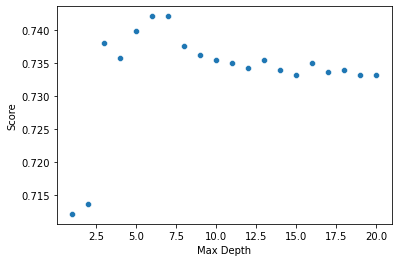

In [ ]:
# Write your code here.

# -------------------
sns.scatterplot(x=cv_scores.index, y=cv_scores.values)
plt.xlabel('Max Depth')
plt.ylabel('Score')

cv_scores.idxmax()

# -------------------

2. Based on the cross validations, what value of the `max_depth` parameter would you use to train a RF on this data set? 

___
__Question 2 Answer__:


___

3. Write code to perform your own manual cross validation. Do not use functions from `sklearn` other than `RandomForestClassifier`. To help, we provide an array `random_indices` that is the length of the training set but contains the row numbers in a randomized order. We also provide `integer_splits`, which is the breakpoints in the total number of rows that will allow 5-equal sized folds. You can refer to the procedure descrived above to structure your code. 

  For each `max_depth` value, you need to fit the data and evaluate it on each fold (this results in fitting the model 105 = 21 x 5 times). Important note, across different parameter values, the folds should be consistent.


In [ ]:
depths = list(range(1, 22)) # candidate values of "max_depth"
cv_scores = pd.Series(index=depths, dtype=float)  # use to store the model performance on each hold-out set.

m = 5  # number of folds
training_set_size = len(y_train) # get the size of the training set
np.random.seed(0) # manually set the random seed (np.random.permutation below doesn't accept a random_state parameter)
random_indices = np.random.permutation(training_set_size) # create an array with the row numbers in a randomized order
fractional_splits = np.concatenate(([0], np.repeat(1/m, m).cumsum())) # create the fractional splits that divide the training set into 5 folds
integer_splits = np.array(np.floor(fractional_splits * training_set_size),dtype=int) # determine the row numbers / breakpoints that divide the training set into 5 folds

# Write your code here. 

# -------------------

for depth in depths:
  total_score = pd.Series(index=range(m))
  for i in range(m):
    v_index = random_indices[integer_splits[i]:integer_splits[i+1]]
    t_index = np.delete(random_indices, range(*integer_splits[i:i+2]))
    
    model = RandomForestClassifier(random_state = 0,
                                   max_depth = depth,
                                   n_estimators = 50,
                                   max_samples = 0.2)
    
    _, v_score = fit_and_score_model(
        model, 
        X_train.iloc[t_index],
        X_train.iloc[v_index],
        y_train.iloc[t_index],
        y_train.iloc[v_index]
    )
    # Record the average out-of-sample error
    total_score.loc[i] = v_score

  cv_scores.loc[depth] = total_score.mean()

sns.scatterplot(x=cv_scores.index, y=cv_scores.values)
plt.xlabel('Max Depth')
plt.ylabel('Score')

# -------------------

4. Compare your RF model to a logistic regression with cross validation (i.e. `LogisticRegressionCV` from `sklearn.linear_model`). Use penalty l2, solver lbfgs and cv with 5 folds. What model is more accurate? 

In [ ]:
# from sklearn.linear_model import LogisticRegressionCV

# Write your code here.  

# -------------------

logregcv = LogisticRegressionCV(penalty='l2', solver='lbfgs', cv=5)
train_score, test_score = fit_and_score_model(logregcv, X_train, X_test, y_train, y_test)



# -------------------

the accuracy on the: 
	 training data is 0.717
	 testing data is 0.717


___
__Question 4 Answer__:



___

# Reflection
As this is an _Analytics in Action_ course, we should think about how valuable our models are with respect to real-world applications. Position yourself as an employee of Wikipedia, and answer the following questions

1. Are your models useful to your company in detecting page vandalism? Why or why not?

___
__Question 1 Answer__:



___

2. What other information about the edits (i.e. feature variables not in the dataset) could be useful to detect vandalism?

___
__Question 2 Answer__:




___

3. The findings in this work centre around the Language Wiki page. Do you think these methods would extend to other pages too?

___
__Question 3 Answer__:



___